#**INTRODUCTION**

This project evaluates three different landing page designs - vibrant, cold, and warm - in driving visitors into transactions and boosting bluetooth speakers sales

# **ABOUT DATASET**

Dataset for this project was downloaded from [Kaggle](https://www.kaggle.com/datasets/sandeep1080/bassburst/data). **This dataset contains website conversion data for bluetooth speaker sales with a total of 30,000 user sessions**. The sessions are segmented by the landing page variant each user saw. The dataset also includes user-specific details, session engagement, product purchases, and payment methods, providing a comprehensive view of how website features and user characteristics influence conversions.

**Column Descriptions :**

| Column Name | Description |
|------|------|
| `user_id` | Unique identifier for each visitor  |
| `session_id` | Unique identifier for each session or visit   |
| `sign_in` |  Indicates if the user logged in via email or used guest access |
| `name` | Name of the visitor (generated from multiple locales)   |
| `demographic_age` | Age of the visitor (ranging from 14 to 80)   |
| `demographic_age_group` | Age group of the visitor: "Teenage", "Adult", "Old"   |
| `demographic_gender` | Gender of the visitor (Male, Female, Not Answered)  |
| `email` |  Email address of the user (if logged in via email)  |
| `location` | The city where the visitor is located   |
| `country` | Country corresponding to the location   |
| `device_type` | Type of device used (Mobile, Desktop, Tablet)   |
| `timestamp` | Session start time   |
| `variant_group` | The landing page design variant the user saw (Vibrant, Cold, Heat)  |
| `time_spent` |  Total time (in minutes) the user spent on the landing page  |
| `pages_visited` | Number of pages the user viewed during the session  |
| `conversion_flag` |Binary flag (0/1) indicating whether the user converted (signed up or made a purchase)   |
| `conversion_type` |  Type of conversion achieved (Signup or Purchase)  |
| `traffic_source` | Source of traffic (Organic, Paid, Social, Referral)|
| `product_purchased` | List of products purchased (if applicable)|
| `revenue` | Total revenue generated from the transaction (if purchase was made)|
| `payment_type` |  Payment method used (Card or COD)|
| `card_type` |  Card type if payment was made by card (Amex, Visa, Master) |
| `coupon_applied` |  Whether a coupon was applied (Yes/No) |
| `bounce_flag` | Indicates if the session was a bounce (only one page visited)|

# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# **LOAD DATA**

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/My Drive/Bootcamp/Final Project/Data Analytics/'
data_path = folder_path + 'cleaned_speakers_data.csv'
data_path

Mounted at /content/drive


'/content/drive/My Drive/Bootcamp/Final Project/Data Analytics/cleaned_speakers_data.csv'

In [ ]:
# load data
df = pd.read_csv(data_path)

# check the first 5 rows to get overview
df.head()

,user_id,session_id,sign_in,name,demographic_age,demographic_age_group,demographic_gender,email,location,country,...,pages_visited,conversion_flag,conversion_type,traffic_source,product_purchased,revenue_$,payment_type,card_type,coupon_applied,bounce_flag
0,U10477,S000001,Email,Victor Navarro-Noël,31,Adult,Female,victornavarronoël251@hotmail.com,Rome,Italy,...,7,0,NCT,Organic,NPP,0.0,NPT,NCAT,ND,1
1,U01536,S000002,Email,王秀云,39,Adult,Female,王秀云617@gmail.com,Madrid,Spain,...,5,0,NCT,Social,NPP,0.0,NPT,NCAT,ND,0
2,U00107,S000003,Guest,Ucchal Sabharwal,68,Old,Male,Not Provided,Manchester,UK,...,7,0,NCT,Organic,NPP,0.0,NPT,NCAT,ND,0
3,U13886,S000004,Email,Virginie Schmitt,72,Old,Female,virginieschmitt827@gmail.com,Sydney,Australia,...,10,0,NCT,Social,NPP,0.0,NPT,NCAT,ND,0
4,U05926,S000005,Email,Cynthia Drake,51,Adult,No Answer,cynthiadrake47@hotmail.com,Mumbai,India,...,6,0,NCT,Organic,NPP,0.0,NPT,NCAT,ND,0


# **DATA PREPROCESSING**

## **Check Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                30000 non-null  object 
 1   session_id             30000 non-null  object 
 2   sign_in                30000 non-null  object 
 3   name                   30000 non-null  object 
 4   demographic_age        30000 non-null  int64  
 5   demographic_age_group  30000 non-null  object 
 6   demographic_gender     30000 non-null  object 
 7   email                  30000 non-null  object 
 8   location               30000 non-null  object 
 9   country                30000 non-null  object 
 10  device_type            30000 non-null  object 
 11  timestamp              30000 non-null  object 
 12  variant_group          30000 non-null  object 
 13  time_spent             30000 non-null  float64
 14  pages_visited          30000 non-null  int64  
 15  co

**Insights:**
1. Dataset contains 30,000 rows with 24 features
2. `timestamp` column has an object datatype instead of date datatype. This column will be converted to date datatype
3. No missing values found if we only look at the data info. This needs further investigation as missing values can be represented as -1, 999, etc

In [ ]:
# convert data type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# check dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                30000 non-null  object        
 1   session_id             30000 non-null  object        
 2   sign_in                30000 non-null  object        
 3   name                   30000 non-null  object        
 4   demographic_age        30000 non-null  int64         
 5   demographic_age_group  30000 non-null  object        
 6   demographic_gender     30000 non-null  object        
 7   email                  30000 non-null  object        
 8   location               30000 non-null  object        
 9   country                30000 non-null  object        
 10  device_type            30000 non-null  object        
 11  timestamp              30000 non-null  datetime64[ns]
 12  variant_group          30000 non-null  object        
 13  t

## **Check and Handle Missing Values**

In [ ]:
# check missing values using .isnull()
df.isnull().sum() / len(df) * 100

,0
user_id,0.0
session_id,0.0
sign_in,0.0
name,0.0
demographic_age,0.0
demographic_age_group,0.0
demographic_gender,0.0
email,0.0
location,0.0
country,0.0


In [ ]:
# check missing values using .unique()
for col in df.columns :
  print(f'Unique values for {col} :')
  print(df[col].unique())

Unique values for user_id :
['U10477' 'U01536' 'U00107' ... 'U09552' 'U11332' 'U06035']
Unique values for session_id :
['S000001' 'S000002' 'S000003' ... 'S029998' 'S029999' 'S030000']
Unique values for sign_in :
['Email' 'Guest']
Unique values for name :
['Victor Navarro-Noël' '王秀云' 'Ucchal Sabharwal' ... 'Rodney Miller' '牛秀珍'
 '莫超']
Unique values for demographic_age :
[31 39 68 72 51 35 43 45 79 73 28 78 53 70 21 15 62 22 54 26 52 27 76 33
 58 69 14 38 71 44 67 17 42 57 80 25 49 30 29 50 55 19 74 18 63 77 66 37
 59 23 75 41 56 24 48 32 34 16 65 64 47 36 60 20 46 61 40]
Unique values for demographic_age_group :
['Adult' 'Old' 'Teenage']
Unique values for demographic_gender :
['Female' 'Male' 'No Answer']
Unique values for email :
['victornavarronoël251@hotmail.com' '王秀云617@gmail.com' 'Not Provided' ...
 'rodneymiller655@gmail.com' '牛秀珍771@gmail.com' '莫超735@yahoo.com']
Unique values for location :
['Rome' 'Madrid' 'Manchester' 'Sydney' 'Mumbai' 'Shanghai' 'Munich'
 'Beijing' 'Paris' 'D

**Insights :** It seems that there are no missing values, so further handling is unnecessary

## **Check and Handle Duplicates**

In [ ]:
df.duplicated().sum()

np.int64(0)

## **Check and Handle Outliers**

In [ ]:
# check statistical summary
df.describe()

,demographic_age,timestamp,time_spent,pages_visited,conversion_flag,revenue_$,bounce_flag
count,30000.000000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,46.905533,2025-01-26 00:24:42.630915072,10.524185,5.501467,0.151167,26.208553,0.189067
min,14.000000,2025-01-01 00:01:18.569492,1.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,2025-01-13 11:59:31.570923008,5.780000,3.000000,0.000000,0.000000,0.000000
50%,47.000000,2025-01-26 01:11:56.911847424,10.580000,5.000000,0.000000,0.000000,0.000000
75%,64.000000,2025-02-07 10:42:08.768300032,15.270000,8.000000,0.000000,0.000000,0.000000
max,80.000000,2025-02-19 21:27:27.575775,20.000000,10.000000,1.000000,2499.000000,1.000000
std,19.405500,NaN,5.481363,2.874208,0.358217,137.294872,0.391568


**Insights :**
1. `time_spent` : average and median `time_spent` by customers are similar. It can be assumed that `time_spent` column has normal distribution. However, histogram is needed to confirm this assumption
2. `pages_visited` : if we only look at median and mean values, it can be assumed that `page_visited` column has right-skew distribution since mean  > median
3. `revenue_$` : Despite having maximum revenue of 2499 USD, 75% of total customers did not generate any revenue. This indicates that only 25% who made purchase with the average revenue of 26.21 USD

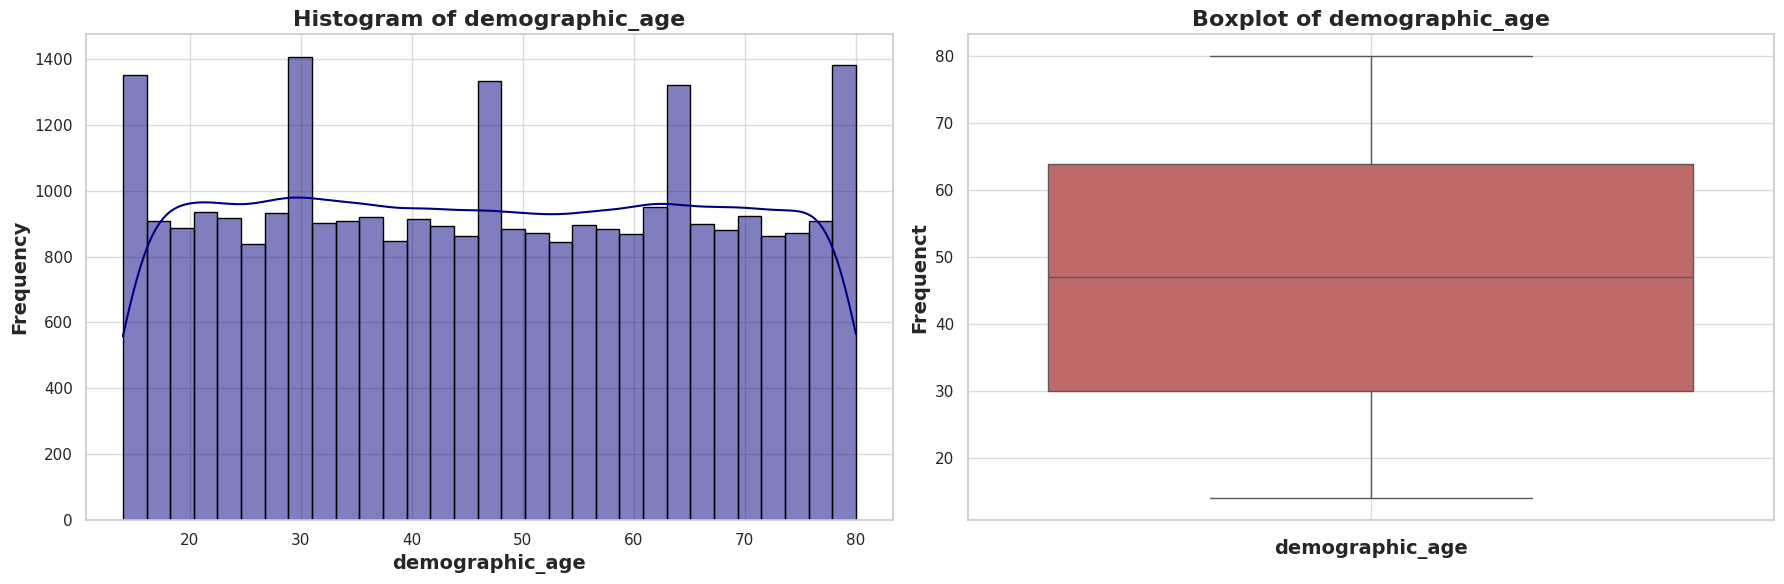

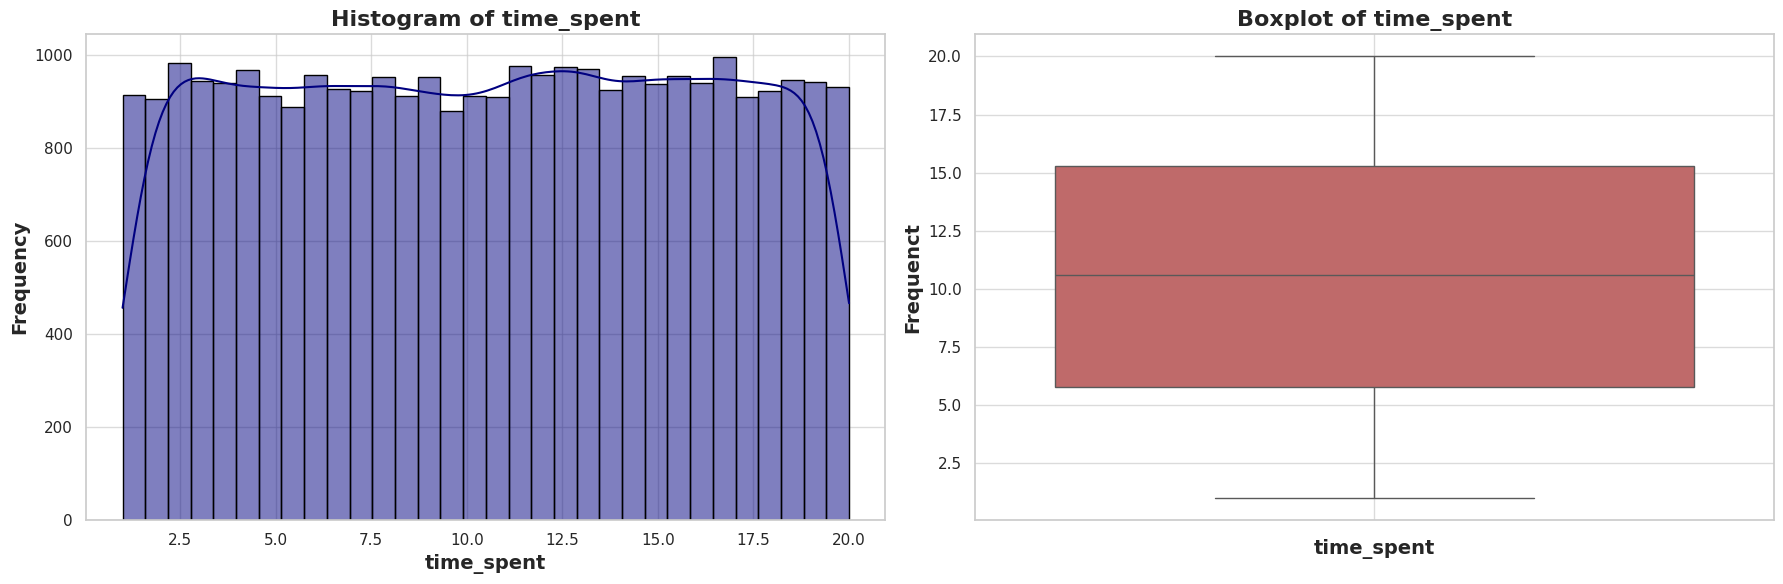

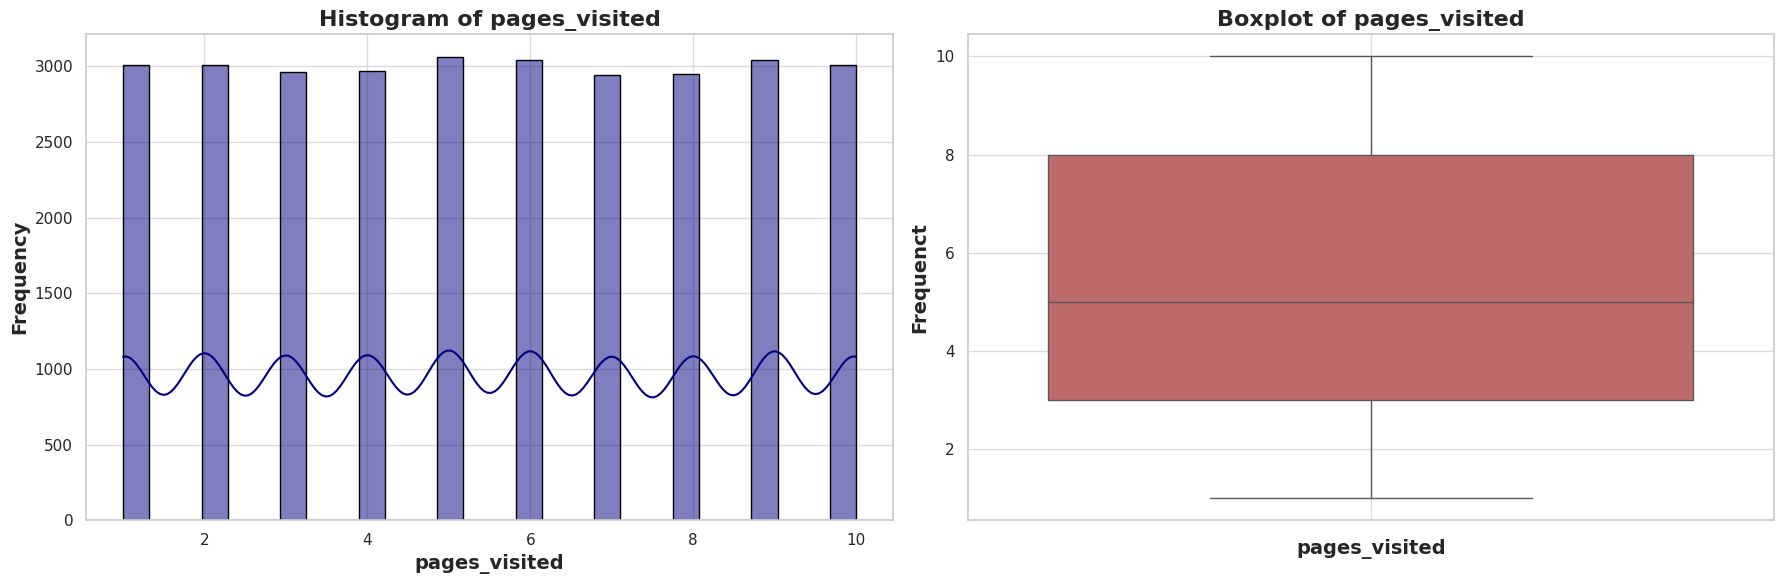

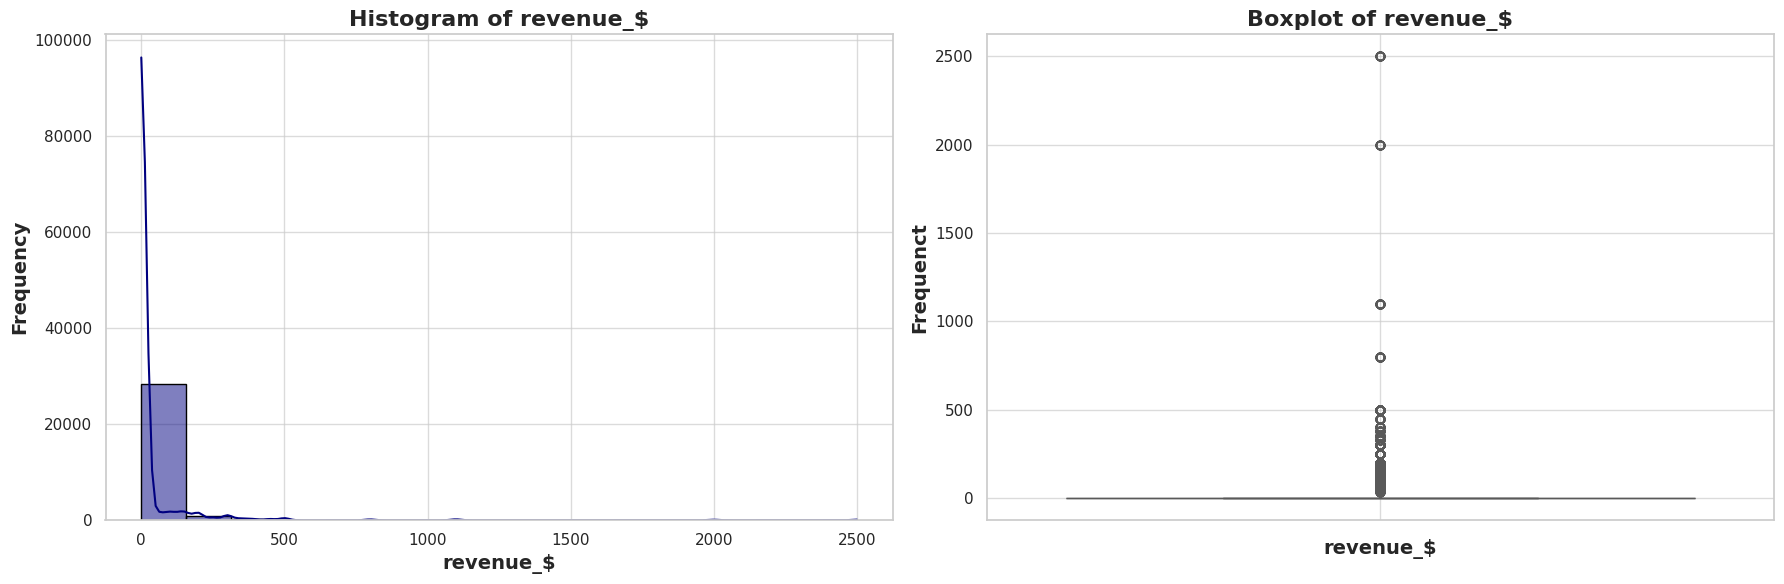

In [ ]:
# plot histogram and boxplot for columns "demographic_age", "time_spent", "pages_visited", "revenue_$"
numeric_cols = ["demographic_age", "time_spent", "pages_visited","revenue_$" ]
# set  seaborn style
sns.set(style = 'whitegrid', palette = 'muted')

# loop kolom
for col in numeric_cols :
  plt.figure(figsize=(18,6))

  # histogram with kde
  plt.subplot(1,2,1)
  sns.histplot(df[col], kde=True, color = 'navy', edgecolor = 'black')
  plt.title(f'Histogram of {col}', fontsize=16, fontweight = 'bold')
  plt.xlabel(col, fontsize = 14, fontweight = 'bold')
  plt.ylabel('Frequency', fontsize=14, fontweight='bold')

  plt.grid(True, alpha=0.7)

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(y=df[col], color = 'indianred')
  plt.title(f'Boxplot of {col}', fontsize=16, fontweight='bold')
  plt.xlabel(col, fontsize=14, fontweight = 'bold')
  plt.ylabel('Frequenct', fontsize=14, fontweight='bold')

  plt.grid(True, alpha=0.7)


  plt.tight_layout()  # function to adjust the plot, so visualization will be neat
  # output the plot
  plt.show()

**Insights :**
1. there are no outliers found in columns `demographic_age`, `time_spent`, `pages_visited`
2. `revenue_$` has lots of outliers up to $2500. If we want to make prediction model, these outliers need to be removed. However, these outliers will be maintained as we want to get comprehensive insights into sales conversion in this project
3. `time_spent` is distributed quite evenly across dataset
4. `pages_visited` is distributed evenly without any peak

## **Feature Engineering**

In [ ]:
# for better data visualization, value 0 and 1 in columns "bounce_flag" and "conversion_flag" will be converted to "Yes" and "No"
df['bounce_flag_visualization'] = df['bounce_flag'].apply(lambda x: 'No' if x==0 else 'Yes')
df['conversion_flag_visualization'] = df['conversion_flag'].apply(lambda x : 'No' if x==0 else 'Yes')

In [ ]:
# Add a new column "DayofWeek"
df['DayofWeek'] = df['timestamp'].dt.dayofweek

# change day name
day_map = {
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thursday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday'
}

# replace DayofWeek in numbers to names
df['DayofWeek'] = df['DayofWeek'].replace(day_map)

# sort the day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayofWeek'] = pd.Categorical(df['DayofWeek'], ordered=True, categories = day_order)

In [ ]:
df['Date'] = df['timestamp'].dt.date

# convert to date datatype
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Extract time from "timestamp" column
df['Hour'] = df['timestamp'].dt.hour

# Categorize "Hour" column into 3 : morning, afternoon, evening
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Terapkan fungsi ke kolom Hour
df['TimeCategory'] = df['Hour'].apply(categorize_time)

In [ ]:
# check dataset
df.head()

,user_id,session_id,sign_in,name,demographic_age,demographic_age_group,demographic_gender,email,location,country,...,payment_type,card_type,coupon_applied,bounce_flag,bounce_flag_visualization,conversion_flag_visualization,DayofWeek,Date,Hour,TimeCategory
0,U10477,S000001,Email,Victor Navarro-Noël,31,Adult,Female,victornavarronoël251@hotmail.com,Rome,Italy,...,NPT,NCAT,ND,1,Yes,No,Saturday,2025-01-18,21,Evening
1,U01536,S000002,Email,王秀云,39,Adult,Female,王秀云617@gmail.com,Madrid,Spain,...,NPT,NCAT,ND,0,No,No,Sunday,2025-01-12,4,Evening
2,U00107,S000003,Guest,Ucchal Sabharwal,68,Old,Male,Not Provided,Manchester,UK,...,NPT,NCAT,ND,0,No,No,Monday,2025-01-20,6,Morning
3,U13886,S000004,Email,Virginie Schmitt,72,Old,Female,virginieschmitt827@gmail.com,Sydney,Australia,...,NPT,NCAT,ND,0,No,No,Saturday,2025-02-01,8,Morning
4,U05926,S000005,Email,Cynthia Drake,51,Adult,No Answer,cynthiadrake47@hotmail.com,Mumbai,India,...,NPT,NCAT,ND,0,No,No,Sunday,2025-02-16,16,Afternoon


In [ ]:
# understand the age range for age group
df.groupby('demographic_age_group')['demographic_age'].min()

,demographic_age
demographic_age_group,
Adult,20
Old,65
Teenage,14


In [ ]:
df.groupby('demographic_age_group')['demographic_age'].max()

,demographic_age
demographic_age_group,
Adult,64
Old,80
Teenage,19


# **EXPLORATORY DATA ANALYSIS (EDA)**

## **Categorical Columns**

In [ ]:
categorical_cols = [col for col in df.select_dtypes('object').columns]
categorical_cols

['user_id',
 'session_id',
 'sign_in',
 'name',
 'demographic_age_group',
 'demographic_gender',
 'email',
 'location',
 'country',
 'device_type',
 'variant_group',
 'conversion_type',
 'traffic_source',
 'product_purchased',
 'payment_type',
 'card_type',
 'coupon_applied',
 'bounce_flag_visualization',
 'conversion_flag_visualization',
 'TimeCategory']

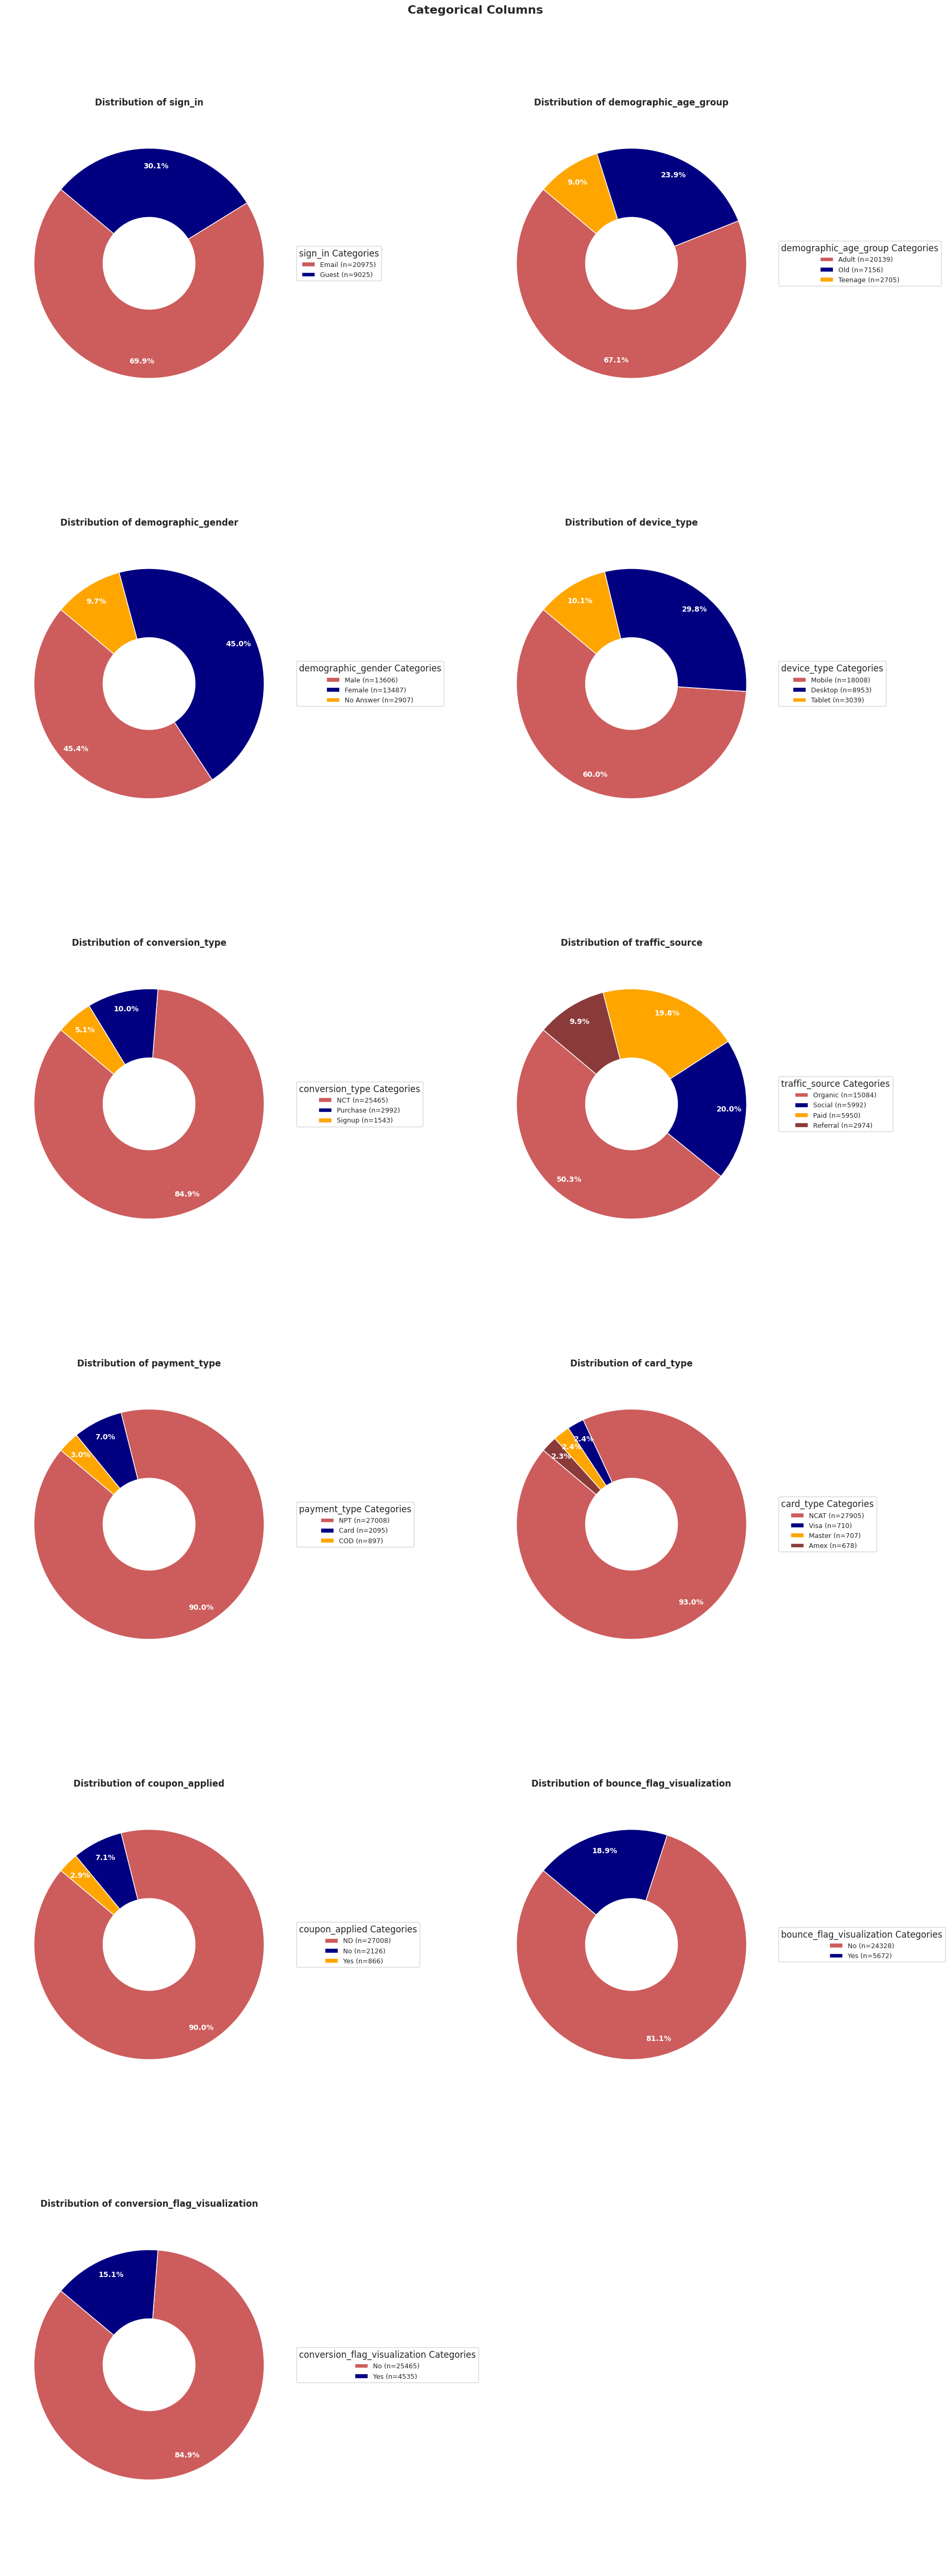

In [ ]:
# Custom muted palette
custom_palette = ['indianred', 'navy', 'orange',
                  '#8B3A3A', '#000080', '#FFA500']  # Darker variants for muted effect

# Filter categorical columns
categorical_cols = [col for col in df.select_dtypes('object').columns
                   if col in ['sign_in', 'demographic_age_group', 'demographic_gender',
                              'device_type', 'conversion_flag_visualization', 'conversion_type',
                             'traffic_source', 'payment_type', 'card_type',
                             'coupon_applied', 'bounce_flag_visualization']]

# Set up subplots
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 8*n_rows), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    counts = df[col].value_counts()

    # Use modulo to cycle through custom colors
    colors = [custom_palette[i % len(custom_palette)] for i in range(len(counts))]

    # Create donut chart (more space-efficient)
    wedges, texts, autotexts = ax.pie(
        counts,
        labels=None,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops={'width': 0.6, 'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 10, 'fontweight': 'bold', 'color': 'white'},
        pctdistance=0.85  # Push percentages inward
    )

    # Add legend with counts
    legend_labels = [f"{label} (n={count})" for label, count in zip(counts.index, counts)]
    ax.legend(wedges, legend_labels,
              title=f"{col} Categories",
              loc="center left",
              bbox_to_anchor=(1, 0.5),
              fontsize=9)

    # Add center title
    ax.set_title(f"Distribution of {col}", fontsize=12, pad=20, fontweight='bold')

    # Custom label styling
    for text in texts + autotexts:
        text.set_fontsize(10)
        text.set_fontweight('bold')

# Hide unused axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Categorical Columns',
             y=1.02, fontsize=16, fontweight='bold')
plt.show()

**Insights**:
1. `sign_in` : majority of users (69.9%) visit the website by signing in email
2. `device_type` : more than half of users visit the website through their mobiles
3. `demographic_gender` : proportions of male dan female are quite the same, both at 45%
4. `demographic_age_group` : adults dominated users who visited the website. This indicates that speaker products may be preferred in the that age group
5. `conversion_flag` and `conversion_type` : only 15.1% of total users either sign up or made purchase with purchases accounting for the majority of conversions compared to sign-ups
6. `payment_type` and `card_type` : among users who made transactions, most customers prefer card over COD with the proportion of any card type used is the same
7. `bounce_flag` : With a 81.1% non-bounce rate, most visitors demonstrate engagement by viewing multiple pages. However, the low conversion rate of 15.1%  can indicate that users were not interested in products

## **Number of Session**

In [ ]:
# make a pivot table for session pattern based on day and time (morning, afternoon, evening)
pivot_transaction = pd.pivot_table(df,
                                   index = 'DayofWeek',
                                   columns = 'TimeCategory',
                                   values = 'session_id',
                                   aggfunc = 'nunique').reset_index().replace({'session_id' : 'SessionCount'})

pivot_transaction

/tmp/ipython-input-20-1022979687.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_transaction = pd.pivot_table(df,


TimeCategory,DayofWeek,Afternoon,Evening,Morning
0,Monday,1040,2119,1135
1,Tuesday,1082,2087,1044
2,Wednesday,1167,2319,1226
3,Thursday,1030,2199,1035
4,Friday,1036,2152,1029
5,Saturday,1074,2077,1053
6,Sunday,982,2075,1039


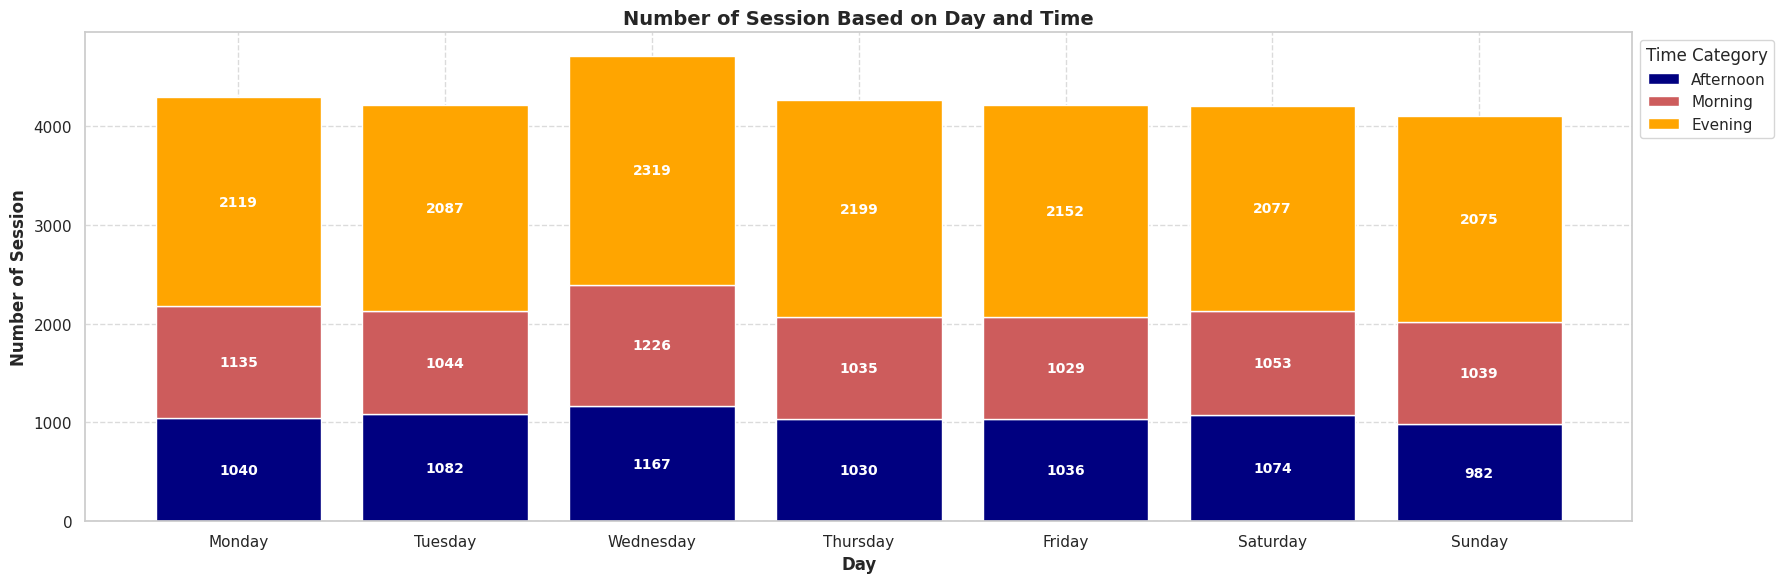

In [ ]:
# stacked bar plot
plt.figure(figsize=(18,6))

# bottom bar plot
plt.bar(pivot_transaction['DayofWeek'], pivot_transaction['Afternoon'], color ='navy', label='Afternoon')

# middle bar plot
plt.bar(pivot_transaction['DayofWeek'], pivot_transaction['Morning'], color ='indianred', bottom =pivot_transaction['Afternoon'], label='Morning' )

# upper bar plot
plt.bar(pivot_transaction['DayofWeek'], pivot_transaction['Evening'], color ='orange', bottom = pivot_transaction['Afternoon']+pivot_transaction['Morning'], label='Evening' )

# add text
for i in range(len(pivot_transaction)):
    # Afternoon text
    if pivot_transaction['Afternoon'][i] > 0:
        plt.text(i,
                 pivot_transaction['Afternoon'][i]/2,
                 f"{pivot_transaction['Afternoon'][i]:.0f}",
                 ha='center', va='center', color='white', fontsize=10, fontweight='bold')

    # Morning text
    if pivot_transaction['Morning'][i] > 0:
        plt.text(i,
                 pivot_transaction['Afternoon'][i] + pivot_transaction['Morning'][i]/2,
                 f"{pivot_transaction['Morning'][i]:.0f}",
                 ha='center', va='center', color='white', fontsize=10, fontweight='bold')

    # Evening text
    if pivot_transaction['Evening'][i] > 0:
        plt.text(i,
                 pivot_transaction['Afternoon'][i] + pivot_transaction['Morning'][i] + pivot_transaction['Evening'][i]/2,
                 f"{pivot_transaction['Evening'][i]:.0f}",
                 ha='center', va='center', color='white', fontsize=10, fontweight='bold')

plt.title('Number of Session Based on Day and Time', fontsize=14, weight='bold')
plt.xlabel('Day', weight='bold')
plt.ylabel('Number of Session', weight='bold')
plt.legend(title='Time Category',bbox_to_anchor=(1, 1),loc='upper left')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **HYPOTHESIS TESTING**

In this section, hypothesis testing will be done to evaluate the effectiveness of different landing page designs on conversion




## **Landing Page Designs**

### **Conversion Rate**

To evaluate which design is more effective in attracting customer to either make purchase or sign-up, the proportion Z-test will be conducted. The test will be implemented in pairwise :


*   Vibrant vs Cold
*   Cold vs Heat
*   Vibrant vs Heat



In [ ]:
df.groupby('variant_group')['conversion_flag'].value_counts(normalize=True)

variant_group  conversion_flag
Cold           0                  0.819198
               1                  0.180802
Heat           0                  0.848294
               1                  0.151706
Vibrant        0                  0.878658
               1                  0.121342
Name: proportion, dtype: float64

**Insights** : if we just look at the table, it seems that there's a slight difference of 3% in the proportion of conversion rate among all variants. This needs to be confirmed through hypothesis test.

**Hypotheses :**
1. Vibrant vs Cold :
  
  H0 : There is no significant difference in conversion rate between vibrant and cold landing pages
  
  H1 :  Vibrant landing page has lower conversion rate than cold landing page

2. Cold vs Heat :

  H0 : There is no significant difference in conversion rate between cold and heat landing pages
  
  H1 : Heat landing page has lower conversion rate than cold landing page

3. Vibrant vs Heat :
  
  H0 : There is no significant difference in conversion rate between vibrant and heat landing pages
  
  H1 : Vibrant landing page has lower conversion rate than heat landing page


**Selection of Hypothesis test :**  proportion z-test one tailed

**Alpha : 5%**

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# separate dataset based on variant_group
vibrant = df[df['variant_group'] =='Vibrant']
heat = df[df['variant_group'] == 'Heat']
cold = df[df['variant_group'] == 'Cold']

# make a function for hypothesis testing
def z_test(df1, df2) :
  conversion = [df1['conversion_flag'].sum(), df2['conversion_flag'].sum()]
  total_session = [df1.shape[0], df2.shape[0]]
  z_stat, p_value = proportions_ztest(conversion, total_session, alternative='smaller')

  alpha = 0.05
  if p_value < alpha:
    print(f'Reject H0:  one option has lower conversion rate than other (p_value = {p_value})')
  else:
    print(f'Failed to reject H0 p_value : there is no difference in conversion rate {p_value})')

In [ ]:
# vibrant vs cold
z_test(vibrant, cold)

Reject H0:  one option has lower conversion rate than other (p_value = 4.061825895410735e-32)


In [ ]:
# vibrant vs heat
z_test(vibrant, heat)

Reject H0:  one option has lower conversion rate than other (p_value = 1.8658019139044934e-10)


In [ ]:
# heat vs cold
z_test(heat, cold)

Reject H0:  one option has lower conversion rate than other (p_value = 1.688976183464074e-08)


**Insights** : Different colors used in landing pages were proved to significantly impact customer behaviour since p value < alpha with summary :
1. Vibrant has a statistcally significant lower conversion rate than cold
2. Vibrant has a statistcally significant lower conversion rate than heat
3. Heat has a statistcally significant lower conversion rate than cold

It can be concluded that cold landing page drive higher conversion rate

### **Session Duration**

As we know that cold landing page lead to higher conversion, we want to know wether different color used can improve customer engagement by estimating how long customers stay in the website/app.  

In [ ]:
df.groupby('variant_group')['time_spent'].mean()

,time_spent
variant_group,
Cold,10.534523
Heat,10.481272
Vibrant,10.556797


**Insights** : if we just look at the table, it customers spent similar time regardless different landing page designs. This needs to be confirmed through hypothesis test.

**Hypotheses :**

H0 : there is no difference in session duration among different landing page designs ($\mu_{\text{vibrant}} = \mu_{\text{heat}} = \mu_{\text{cold}}$)

H1 : at least one mean duration session of design differs from others

**Selection of Hypothesis test :** ANOVA one-way

**Alpha : 5%**

Before doing ANOVA test, normality test is necessary to determine wether ANOVA can still be proceeded or not

In [ ]:
# take only column "time_spent"
session_vibrant = vibrant['time_spent']
session_heat = heat['time_spent']
session_cold = cold['time_spent']

In [ ]:
from scipy.stats import kstest, norm

# normality test
def normality_test_ks(x, alpha=0.05):
    stat, p_value = kstest(x, 'norm')
    print(f"Kolmogorov-Smirnov Test: p-value = {p_value:.4f}")
    if p_value > alpha:
        print(f"Failed to reject normality (p > {alpha})")
    else:
        print(f"Reject normality (p <= {alpha})")


In [ ]:
normality_test_ks(session_vibrant)

Kolmogorov-Smirnov Test: p-value = 0.0000
Reject normality (p <= 0.05)


In [ ]:
normality_test_ks(session_heat)

Kolmogorov-Smirnov Test: p-value = 0.0000
Reject normality (p <= 0.05)


In [ ]:
normality_test_ks(session_cold)

Kolmogorov-Smirnov Test: p-value = 0.0000
Reject normality (p <= 0.05)


In [ ]:
normality_test_ks(session_heat)

Kolmogorov-Smirnov Test: p-value = 0.0000
Reject normality (p <= 0.05)


Due to non-normal distribution, Kruskal-Wallis test will be used instead of one-way ANOVA

In [ ]:
from scipy.stats import kruskal
def kruskal_test(df1, df2, df3) :
  # Kruskal-Wallis test
  stat, p_value = kruskal(df1,df2,df3)
  print(f"Kruskal-Wallis P-value: {p_value:.4f}")

  # Interpretation
  if p_value < 0.05:
    print('Reject H0 :  at least one median differs from others ')
  else:
    print('Failed to reject H0 : there is no difference')

In [ ]:
kruskal_test(session_vibrant, session_heat, session_cold)

Kruskal-Wallis P-value: 0.6042
Failed to reject H0 : there is no difference


**Insights :** Although colors used in landing page affect customer's conversion rate, there is no difference in duration session among different landing page designs. It indicates that users are engaged with any landing page design as they scroll the website/app in the same duration

### **Page View**

In [ ]:
df.columns

Index(['user_id', 'session_id', 'sign_in', 'name', 'demographic_age',
       'demographic_age_group', 'demographic_gender', 'email', 'location',
       'country', 'device_type', 'timestamp', 'variant_group', 'time_spent',
       'pages_visited', 'conversion_flag', 'conversion_type', 'traffic_source',
       'product_purchased', 'revenue_$', 'payment_type', 'card_type',
       'coupon_applied', 'bounce_flag', 'bounce_flag_visualization',
       'conversion_flag_visualization', 'DayofWeek', 'Date', 'Hour',
       'TimeCategory'],
      dtype='object')

In [ ]:
df.groupby('variant_group')['pages_visited'].mean()

,pages_visited
variant_group,
Cold,5.492748
Heat,5.501596
Vibrant,5.509954


**Insights** : if we just look at the table, it seems that customers spent similar time regardless different landing page designs. This needs to be confirmed through hypothesis test.

**Hypotheses :**

H0 : there is no difference in number of pages visited among different landing page designs ($\mu_{\text{vibrant}} = \mu_{\text{heat}} = \mu_{\text{cold}}$)

H1 : at least one meannumber of pages of design differs from others

**Selection of Hypothesis test :** ANOVA one-way

**Alpha : 5%**

Before doing ANOVA test, normality test is necessary to determine wether ANOVA can still be proceeded or not

In [ ]:
# take only column "pages_visited"
pages_vibrant = vibrant['pages_visited']
pages_heat = heat['pages_visited']
pages_cold = cold['pages_visited']

In [ ]:
normality_test_ks(pages_vibrant)

Kolmogorov-Smirnov Test: p-value = 0.0000
Reject normality (p <= 0.05)


In [ ]:
normality_test_ks(pages_heat)

Kolmogorov-Smirnov Test: p-value = 0.0000
Reject normality (p <= 0.05)


In [ ]:
normality_test_ks(pages_cold)

Kolmogorov-Smirnov Test: p-value = 0.0000
Reject normality (p <= 0.05)


In [ ]:
kruskal_test(pages_vibrant, pages_heat, pages_cold)

Kruskal-Wallis P-value: 0.9143
Failed to reject H0 : there is no difference


## **Customer Demographic**

Besides doing hypothesis testing for landing pages, the analysis will be extended to customer demographic. For customer demographic, hypothesis testing will be focused on conversion rates and sales

### **Gender**

In [ ]:
# check conversio rates based on gender
df.groupby('demographic_gender')['conversion_flag'].value_counts(normalize=True)

demographic_gender  conversion_flag
Female              0                  0.847112
                    1                  0.152888
Male                0                  0.851757
                    1                  0.148243
No Answer           0                  0.843137
                    1                  0.156863
Name: proportion, dtype: float64

**Insights** : it seems that female has slightly higher conversion rates than male customers

**Hypotheses :**


H0 : There is no significant difference in conversion rate between male and female customers

H1 : Male customers have lower conversion rate than female customers

**Selection of Hypothesis test :** proportion z-test one tailed

**Alpha :** 5%

In [ ]:
# separate dataset based on gender
female = df[df['demographic_gender']=='Female']
male = df[df['demographic_gender']=='Male']

# proportion z-test
z_test(male, female)

Failed to reject H0 p_value : there is no difference in conversion rate 0.14256592098711957)


**Insights:** there is no difference in conversion rate between female and male customers.

Difference in total revenue generated by male and female customers will be tested statistically.


In [ ]:
df.columns

Index(['user_id', 'session_id', 'sign_in', 'name', 'demographic_age',
       'demographic_age_group', 'demographic_gender', 'email', 'location',
       'country', 'device_type', 'timestamp', 'variant_group', 'time_spent',
       'pages_visited', 'conversion_flag', 'conversion_type', 'traffic_source',
       'product_purchased', 'revenue_$', 'payment_type', 'card_type',
       'coupon_applied', 'bounce_flag', 'bounce_flag_visualization',
       'conversion_flag_visualization', 'DayofWeek', 'Date', 'Hour',
       'TimeCategory'],
      dtype='object')

In [ ]:
# check difference of average revenue based on gender
df.groupby('demographic_gender')['revenue_$'].mean()

,revenue_$
demographic_gender,
Female,25.451225
Male,26.855290
No Answer,26.695163


**Insights** : It seems that male customers spend more money than female customers

**Hypotheses :**

H0 : There is no significant difference in average revenue between male and female customers

H1 : Male customers have higher average revenue than female customers

**Selection of Hypothesis test :** independent t-test

**Alpha :**5%

In [ ]:
# separate data
revenue_female = female['revenue_$']
revenue_male = male['revenue_$']

# conduct normality test
normality_test_ks(revenue_female)

Kolmogorov-Smirnov Test: p-value = 0.0000
Reject normality (p <= 0.05)


In [ ]:
normality_test_ks(revenue_male)

Kolmogorov-Smirnov Test: p-value = 0.0000
Reject normality (p <= 0.05)


**Insights :** both distirbutions are not normally distributed, so non-parametric test (Mann-Whitney U test) wil be used instead of independent t-test

In [ ]:
def mann_whitney(df1, df2) :
  stat, p_value = stats.mannwhitneyu(df1,df2, alternative='greater')
  print(f"Mann-Whitney P-value: {p_value:.4f}")

  # Interpretation
  if p_value < 0.05:
    print('Reject H0 :  at least one mean values is higher than others ')
  else:
    print('Failed to reject H0 : there is no difference')


In [ ]:
 mann_whitney(revenue_male, revenue_female)

Mann-Whitney P-value: 0.5596
Failed to reject H0 : there is no difference


### **Age Group**

In [ ]:
df.columns

Index(['user_id', 'session_id', 'sign_in', 'name', 'demographic_age',
       'demographic_age_group', 'demographic_gender', 'email', 'location',
       'country', 'device_type', 'timestamp', 'variant_group', 'time_spent',
       'pages_visited', 'conversion_flag', 'conversion_type', 'traffic_source',
       'product_purchased', 'revenue_$', 'payment_type', 'card_type',
       'coupon_applied', 'bounce_flag', 'bounce_flag_visualization',
       'conversion_flag_visualization', 'DayofWeek', 'Date', 'Hour',
       'TimeCategory'],
      dtype='object')

In [ ]:
# check conversio rates based on age group
df.groupby('demographic_age_group')['conversion_flag'].value_counts(normalize=True)

demographic_age_group  conversion_flag
Adult                  0                  0.850142
                       1                  0.149858
Old                    0                  0.845165
                       1                  0.154835
Teenage                0                  0.848799
                       1                  0.151201
Name: proportion, dtype: float64

In [ ]:
df.demographic_age_group.unique()

array(['Adult', 'Old', 'Teenage'], dtype=object)

**Insights :** it seems that all the age groups have slight difference each other

**Hypotheses :**

1. Adult vs Old :

  H0 : There is no significant difference in conversion rate between adult and old age groups

  H1 : Adult age group has lower conversion rate than old age group

2. Old vs Teenage :

  H0 : There is no significant difference in conversion rate between old and teenage age groups

  H1 : Teenage age group has lower conversion rate than old age group

3. Adult vs Teenage:

  H0 : There is no significant difference in conversion rate between adult and teenage age groups

  H1 : Adult has lower conversion rate than teenage

**Selection of Hypothesis test :** proportion z-test one tailed

**Alpha :**5%

In [ ]:
# separate dataset
adult = df[df['demographic_age_group']== 'Adult']
old = df[df['demographic_age_group' ]== 'Old']
teenage = df[df['demographic_age_group']=='Teenage']

In [ ]:
z_test(adult, old)

Failed to reject H0 p_value : there is no difference in conversion rate 0.1563643557478146)


In [ ]:
z_test(adult, teenage)

Failed to reject H0 p_value : there is no difference in conversion rate 0.4271400246145496)


In [ ]:
z_test(teenage, old)

Failed to reject H0 p_value : there is no difference in conversion rate 0.32772273997833185)


**Insights :** It was proved that all age groups are not statistically significant different

Now, difference in revenue will be checked across age group

In [ ]:
# check difference in average revenue across age group
df.groupby('demographic_age_group')['revenue_$'].mean()

,revenue_$
demographic_age_group,
Adult,25.197756
Old,26.679271
Teenage,32.488773


**Insights :** Teenagers are likely to spend more money on speakers than other age groups

**Hypotheses :**

H0 : there is no difference in average revenung among different age groups (  ($\mu_{\text{adult}} = \mu_{\text{old}} = \mu_{\text{teenage}}$) )

H1 : at least one mean revenue differs from others

**Selection of Hypothesis test :**ANOVA one-way

**Alpha :** 5%

Before doing ANOVA test, normality test is necessary to determine wether ANOVA can still be proceeded or not

In [ ]:
adult_revenue = adult['revenue_$']
old_revenue = old['revenue_$']
teenage_revenue = teenage['revenue_$']

In [ ]:
# check normality
normality_test_ks(adult_revenue)

Kolmogorov-Smirnov Test: p-value = 0.0000
Reject normality (p <= 0.05)


In [ ]:
# check normality
normality_test_ks(teenage_revenue)

Kolmogorov-Smirnov Test: p-value = 0.0000
Reject normality (p <= 0.05)


In [ ]:
# check normality
normality_test_ks(old_revenue)

Kolmogorov-Smirnov Test: p-value = 0.0000
Reject normality (p <= 0.05)


Due to non-normal distribution, Kruskal-Wallis test will be used instead of one-way ANOVA

In [ ]:
kruskal_test(adult_revenue, teenage_revenue, old_revenue)

Kruskal-Wallis P-value: 0.8773
Failed to reject H0 : there is no difference


## **Marketing Channel**

Hypothesis testing will also be done for marketing channel analysis. In this section, the analysis will be focused on conversion rates and bounce rates.

### **Conversion Rate**

In [ ]:
df.columns

Index(['user_id', 'session_id', 'sign_in', 'name', 'demographic_age',
       'demographic_age_group', 'demographic_gender', 'email', 'location',
       'country', 'device_type', 'timestamp', 'variant_group', 'time_spent',
       'pages_visited', 'conversion_flag', 'conversion_type', 'traffic_source',
       'product_purchased', 'revenue_$', 'payment_type', 'card_type',
       'coupon_applied', 'bounce_flag', 'bounce_flag_visualization',
       'conversion_flag_visualization', 'DayofWeek', 'Date', 'Hour',
       'TimeCategory'],
      dtype='object')

In [ ]:
df.groupby('traffic_source')['conversion_flag'].value_counts(normalize=True)

traffic_source  conversion_flag
Organic         0                  0.848515
                1                  0.151485
Paid            0                  0.843193
                1                  0.156807
Referral        0                  0.848352
                1                  0.151648
Social          0                  0.855474
                1                  0.144526
Name: proportion, dtype: float64

**Insights :** There is only a slight difference in conversion rate among all the channels


To evaluate which channel is more effective in attracting customer to either make purchase or sign-up, the proportion Z-test will be conducted. The test will be implemented in pairwise :


*   Organic vs Paid
*   Organic vs Referral
*   Organic vs Social
*   Paid vs Referral
*   Paid vs Social
*   Referral vs Social

**Hypotheses :**
1. Organic vs Paid :
  
  H0 : There is no significant difference in conversion rate between organic and paid channels
  
  H1 :  Oraganic channel has lower conversion rate than paid channel

2. Organic vs Referral:

  H0 : There is no significant difference in conversion rate between organic and referral channels
  
  H1 : Oraganic channel has lower conversion rate than referral channel

3. Organic vs Social :
  
  H0 : There is no significant difference in conversion rate between organic and social channels
  
  H1 : Social has lower conversion rate than organic channel

4. Paid vs Referral :
  
  H0 : There is no significant difference in conversion rate between paid and referral channels
  
  H1 : Referral channel has lower conversion rate than paid channel

5. Paid vs Social :

  H0 : There is no significant difference in conversion rate between paid and social channels
  
  H1 : Social channel has lower conversion rate than paid channel

6. Referral vs Social :
  
  H0 : There is no significant difference in conversion rate between referral and social channels
  
  H1 : Social has lower conversion rate than referral channel


**Selection of Hypothesis test :**  proportion z-test one tailed

**Alpha : 5%**

In [ ]:
# separate dataset
organic = df[df['traffic_source']=='Organic']
paid = df[df['traffic_source']=='Paid']
referral = df[df['traffic_source']=='Referral']
social = df[df['traffic_source']=='Social']

In [ ]:
z_test(organic, paid)

Failed to reject H0 p_value : there is no difference in conversion rate 0.16710374886918228)


In [ ]:
z_test(organic, referral)

Failed to reject H0 p_value : there is no difference in conversion rate 0.4909836834084679)


In [ ]:
z_test(social, organic)

Failed to reject H0 p_value : there is no difference in conversion rate 0.10062504130492067)


In [ ]:
z_test(referral , paid)

Failed to reject H0 p_value : there is no difference in conversion rate 0.2628304833992303)


In [ ]:
z_test(social, paid)

Reject H0:  one option has lower conversion rate than other (p_value = 0.030335355280083912)


In [ ]:
z_test(social, referral)

Failed to reject H0 p_value : there is no difference in conversion rate 0.1848901402259558)


**Insights :**
1. **Social media has the lowest conversion rate** than other channels even though it is not statistically different when comparing to referral and organic. However, it is proved that **social media has a significantly lower conversion rate (14.45%) vs. Paid (15.68%) (p < 0.05)**
2. Organic, paid, and referral channels have similar conversion rates, so the conversion rates among these channels are not significant different

### **Bounce Rate**

In [ ]:
df.groupby('traffic_source')['bounce_flag'].value_counts(normalize=True)

traffic_source  bounce_flag
Organic         0              0.812649
                1              0.187351
Paid            0              0.806387
                1              0.193613
Referral        0              0.803631
                1              0.196369
Social          0              0.814753
                1              0.185247
Name: proportion, dtype: float64

In [ ]:
def z_test_bounce(df1, df2) :
  conversion = [df1['bounce_flag'].sum(), df2['bounce_flag'].sum()]
  total_session = [df1.shape[0], df2.shape[0]]
  z_stat, p_value = proportions_ztest(conversion, total_session, alternative='smaller')

  alpha = 0.05
  if p_value < alpha:
    print(f'Reject H0:  one option has lower bounce rate than other (p_value = {p_value})')
  else:
    print(f'Failed to reject H0 p_value : there is no difference in bounce rate {p_value})')

**Hypotheses :**
1. Organic vs Paid :
  
  H0 : There is no significant difference in bounce rate between organic and paid channels
  
  H1 :  Oraganic channel has lower bounce rate than paid channel

2. Organic vs Referral:

  H0 : There is no significant difference in bounce rate between organic and referral channels
  
  H1 : Oraganic channel has lower bounce rate than referral channel

3. Organic vs Social :
  
  H0 : There is no significant difference in bounce rate between organic and social channels
  
  H1 : Social has lower bounce rate than organic channel

4. Paid vs Referral :
  
  H0 : There is no significant difference in bounce rate between paid and referral channels
  
  H1 : Paid channel has lower bounce rate than referral channel

5. Paid vs Social :

  H0 : There is no significant difference in bounce rate between paid and social channels
  
  H1 : Social channel has lower bounce rate than paid channel

6. Referral vs Social :
  
  H0 : There is no significant difference in bounce rate between referral and social channels
  
  H1 : Social has lower bounce rate than referral channel


**Selection of Hypothesis test :**  proportion z-test one tailed

**Alpha : 5%**

In [ ]:
z_test_bounce(organic, paid)

Failed to reject H0 p_value : there is no difference in bounce rate 0.14809724144695552)


In [ ]:
z_test_bounce(organic, referral)

Failed to reject H0 p_value : there is no difference in bounce rate 0.1254020516111412)


In [ ]:
z_test_bounce(social, organic)

Failed to reject H0 p_value : there is no difference in bounce rate 0.36184813327811033)


In [ ]:
z_test_bounce(paid, referral)

Failed to reject H0 p_value : there is no difference in bounce rate 0.3783068930169912)


In [ ]:
z_test_bounce(paid, social)

Failed to reject H0 p_value : there is no difference in bounce rate 0.8783238803527397)


In [ ]:
z_test_bounce(referral, social)

Failed to reject H0 p_value : there is no difference in bounce rate 0.8973493714544081)


**Insights :** No difference in bounce rate among all the channels

In [ ]:
df.to_excel('Processed_ab_testing.xlsx')